In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import afterRevision as ar
import scriptFile as sf
import projRelatedHelperFuncs as prHF
import pandas as pd

## Some params for the whole notebook

In [35]:
run_for_explainibility = False
run_for_cluster_test = False
use_params = ar.initialize_procedure(use_dist_as=0, cluster_count_use=256, data_ident="hgsk", pca_dim=256)

featuse =  hgsk256
dataset_ident_str =  Dev
cluster_count_use(256) --> clustID(2)
use_dist_as(0) --> diststr(min)
dist_folder =  /home/doga/GithUBuntU/hospisign/dists_for_web


In [36]:
use_params

{'use_dist_as': 0,
 'cluster_count_use': 256,
 'data_ident': 'hgsk',
 'dataset_ident_str': 'Dev',
 'numOfSigns': 11,
 'pca_dim': 256,
 'featuse': 'hgsk256',
 'diststr': 'min',
 'dist_folder': '/home/doga/GithUBuntU/hospisign/dists_for_web',
 'clustID': 2}

## Download the data and labels if not exists

In [11]:
sf.download_data_script()

/home/doga/DataFolder/hs_data/hog_DevSet.mat  is already downloaded 
/home/doga/DataFolder/hs_data/hog_ExpSet.mat  is already downloaded 
/home/doga/DataFolder/hs_data/snv_DevSet.mat  is already downloaded 
/home/doga/DataFolder/hs_data/snv_ExpSet.mat  is already downloaded 
/home/doga/DataFolder/hs_data/skeleton_DevSet.mat  is already downloaded 
/home/doga/DataFolder/hs_data/skeleton_ExpSet.mat  is already downloaded 
/home/doga/DataFolder/hs_data/list_dict_DevSet.txt  is already downloaded 
/home/doga/DataFolder/hs_data/list_dict_ExpSet.txt  is already downloaded 


## Scripts to run for explainibility

In [12]:
if run_for_explainibility:
    acc_table_1, info_table_1 = ar.concat_and_check_explainibility(concat_method=1)
    acc_table_2, info_table_2 = ar.concat_and_check_explainibility(concat_method=2)

In [13]:
if run_for_cluster_test:
    resultDict = ar.run_cluster_test(data_ident="hgsnsk", pca_dim=512, concat_method=2, clusterCount=256, enforce_rerun=True)
    print(resultDict[1][3][1])

## Get extracted features and labels

In [24]:
feats, labels, labels_sui, label_map, exp_vec_dict, exp_val_dict = prHF.combine_pca_hospisign_data(data_ident=use_params["data_ident"], pca_dim=use_params["pca_dim"], dataset_ident_str=use_params["dataset_ident_str"], verbose=1, concat_method=1)

Dev <class 'str'>
hg_ft.shape =  (23202, 900) , sn_ft.shape =  (23202, 1600) , sk_ft.shape =  (23202, 112)
hg - min( 0.0 ), max( 0.9999834670175539 )
sn - min( nan ), max( nan )
sk - min( -1.0 ), max( 1.0 )
nan_sn:  [12283 13272 17393]
Max of featsPCA =  5.240050602414984 , Min of featsPCA =  -4.904166562784208
hgsk .shape =  (23202, 256)  loaded. 0.9168168959193802 <--explainibility.


In [25]:
resultDict, centroid_info_pdf = prHF.run_clustering_hospisign(ft=feats, labels_all=labels, lb_map=label_map, dataToUse=use_params["data_ident"], numOfSigns=use_params["numOfSigns"], pcaCount=use_params["pca_dim"], clustCntVec = [use_params["cluster_count_use"]], clusterModels = ['KMeans'], randomSeed=5, enforce_rerun=True)

*-*-*-*-*-*-*running for :  hgsk256_11_baseResults *-*-*-*-*-*-*
featSet( (23202, 256) ), labels_All( (23202,) )
resultDict will be loaded from( /home/doga/DataFolder/bdResults/baseResults/hgsk256_11_baseResults.npy )
+++frmfile(hgsk256_11_baseResults.npy) clusterModel(  KMeans), clusCnt( 256)=nmiAll(66.30) * acc_cent(87.99) * meanPurity_cent(88.125) * weightedPurity_cent(87.988) * acc_mxhs(88.73) * meanPurity_mxhs(88.864) * weightedPurity_mxhs(88.734) * cnmxh_perc(96.484) * emptyClusters(0)
rerunning the experiment is enforced
2021-06-26 23:07:35
hgsk256_11_baseResults clusterModel( KMeans ), clusterCount( 256 ) running.
Clustering the feat_vec( (23202, 256) ) with n_clusters( 256 ) and model =  KMeans , curTol( 0.0001 ), max_iter( 300 ), at  23:07:35
Clustering done in ( 03:19.91 ), ended at  23:10:54
Clustering completed with ( (256,) ) clusters,  expCnt( 1 )
elapsedTime( 03:19.93 )
(23202,)
(256, 256)
256  expected -  256  bins extracted.  0  of them have 1 sample
hist counts ascen

In [26]:
centroidIDs, centroidLabels, centroidKHSNames = ar.extract_centroid_info(centroid_info_pdf, labels, label_map, verbose=0)

In [31]:
pandas_dict_labels = ar.get_pandas_labels(centroidIDs, verbose=0, **use_params)

pandas_dict saved as /home/doga/GithUBuntU/hospisign/dists_for_web/cluster_centroids_hgsk256_c256.csv


In [32]:
dMin, d, dMea, dMax = ar.dist_2_centroid(pandas_dict_labels, feats, centroidIDs, 5, 4, 2)

calculating distance of  1 4
----xl((1648,)),yl((539,))
----xM((1648, 256)),yM((539, 256))
----dst.shape((1648, 539))
----dMin5.092906789150596,d7.672730424798365,dMea8.947481543424352,dMax13.08369677371614


# Now clustID = 1 if cluster_count_use==32 else 2
## has a meaning

In [38]:
X_all = ar.get_dist_matrix(pandas_dict_labels, feats, centroidIDs, **use_params)

/home/doga/GithUBuntU/hospisign/dists_for_web/dist_clust02.npy is loaded


# Now diststr -- use_dist_as = 1 # 0-min, 1-mean, 2-d
## has a meaning

In [43]:
Xd = ar.change_dist_to_readable_csv(X_all, pandas_dict_labels, feats, centroidIDs, **use_params)
with pd.option_context("display.max_rows", 999, "display.max_columns", 999):
    display(pd.DataFrame(Xd))

<min> Xd((256, 256)) extracted from X_all((256, 256, 3))
mx= 1.0
/home/doga/GithUBuntU/hospisign/dists_for_web/readable_distance_256_min.csv  is being saved


0         1         2         3         4         5         6    \
0    NaN  0.587369  0.743994  0.543218  0.672891  0.742957  0.691581   
1    NaN       NaN  0.798946  0.491860  0.506869  0.767996  0.766685   
2    NaN       NaN       NaN  0.817236  0.867063  0.611221  0.687766   
3    NaN       NaN       NaN       NaN  0.536841  0.804928  0.828907   
4    NaN       NaN       NaN       NaN       NaN  0.781339  0.725195   
5    NaN       NaN       NaN       NaN       NaN       NaN  0.662688   
6    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
7    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
10   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
11   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
12   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
13   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
14   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
15   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
16   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
17   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
18   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
19   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
20   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
21   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
22   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
23   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
24   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
25   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
26   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
27   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
28   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
29   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
30   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
31   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
32   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
33   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
34   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
35   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
36   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
37   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
38   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
39   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
40   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
41   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
42   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
43   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
44   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
45   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
46   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
47   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
48   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
49   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
50   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
51   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
52   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
53   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
54   NaN       NaN       NaN       NaN       

In [44]:
Xs, str_for_db = ar.change_dist_to_similarity(Xd, centroidIDs)

In [45]:
with pd.option_context("display.max_rows", 999, "display.max_columns", 999):
    display(pd.DataFrame(Xs))

0    1    2    3    4    5    6    7    8    9    10   11   12   13   \
0      0   40   25   45   32   25   30   44   34   23   33   44   25   22   
1      0    0   19   50   48   22   23   44   42   23   44   47   19   21   
2      0    0    0   18   13   38   30   39   19   61   34   29   99   27   
3      0    0    0    0   45   19   16   50   51   22   49   47   20   17   
4      0    0    0    0    0   21   27   30   75   18   32   38   19   32   
5      0    0    0    0    0    0   33   76   23   42   31   50   37   43   
6      0    0    0    0    0    0    0   37   32   40   32   33   34   49   
7      0    0    0    0    0    0    0    0   48   35   31   71   30   22   
8      0    0    0    0    0    0    0    0    0   11   32   37   17   38   
9      0    0    0    0    0    0    0    0    0    0   39   33   61   30   
10     0    0    0    0    0    0    0    0    0    0    0   36   28   15   
11     0    0    0    0    0    0    0    0    0    0    0    0   21   29   
12     0    0    0    0    0    0    0    0    0    0    0    0    0   27   
13     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
14     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
15     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
16     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
17     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
18     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
19     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
20     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
21     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
22     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
23     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
24     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
25     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
26     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
27     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
28     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
29     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
30     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
31     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
32     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
33     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
34     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
35     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
36     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
37     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
38     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
39     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
40     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
41     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
42     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
43     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
44     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
45     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
46     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
47     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
48     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
49     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
50     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
5

In [51]:
ar.write_string_similarity_for_web(str_for_db, **use_params)
ar.write_readable_distance_csv(Xs, **use_params)

writing distances of 96823 chars to /home/doga/GithUBuntU/hospisign/dists_for_web/dist_clust02_min.txt as integers ';' seperated
writing normalized distances to /home/doga/GithUBuntU/hospisign/dists_for_web/readable_distance_256_min.csv as csv


# Compare annotations

In [94]:
web_str_dict = ar.retrieve_web_str_dict()
ann_dict = ar.get_annotation_dict_from_web_str_dict(web_str_dict, verbose=0)

32 ogulcan_32
32 simal_32
32 alp_32
256 doga_256
256 doga_256_8
256 ufuk_256
256 alp_256
256 ogulcan_256
256 lale_256


In [95]:
list_to_print, centroidKHSNames = ar.get_annotations_vs_khsNames(ann_dict["lale_256"], centroidLabels, label_map)
display(list_to_print)

0                          1
0     1                    hipShow
1     2                       claw
2     3  frustrated|frustratedCift
3     4                   niceShow
4     5                   headShow
..   ..                        ...
251  10                     meShow
252  12      likeThis|likeThisCift
253  15                   sideFive
254  12      likeThis|likeThisCift
255   7               singlePalmUp

[256 rows x 2 columns]

In [96]:
int_vec, uniq_X = ar.convert_string_annotations_to_int(centroidKHSNames)
display(pd.DataFrame([int_vec, centroidKHSNames]).transpose())

0                          1
0     6                    hipShow
1     2                       claw
2     4  frustrated|frustratedCift
3     9                   niceShow
4     5                   headShow
..   ..                        ...
251   8                     meShow
252   7      likeThis|likeThisCift
253  18                   sideFive
254   7      likeThis|likeThisCift
255  19               singlePalmUp

[256 rows x 2 columns]

In [97]:
ar.test_nmi_func(ann_dict["lale_256"], int_vec, verbose=1)

nmi(ann_vec, gt_vec): 0.9068098269823442
nmi(gt_vec, ann_vec): 0.9068098269823442


In [98]:
lale_annot = [0,1,2,3,4,5,6,7,8,9,10,11,2,12,7,9,7,22,13,22,14,5,9,10,6,8,15,7,0,8,16,2,7,22,19,10,22,2,22,2,1,10,2,3,12,26,16,22,14,5,11,12,10,7,6,10,7,7,2,14,10,2,3,1,7,2,2,13,0,16,17,4,1,22,4,10,2,2,7,12,11,10,16,16,18,9,3,22,5,22,16,22,26,16,12,7,15,12,19,22,13,9,7,22,6,14,20,7,1,16,0,22,15,7,13,21,16,22,22,2,19,1,7,10,11,12,2,14,1,14,7,9,20,7,10,14,7,7,3,16,2,14,2,5,7,2,2,2,1,4,24,9,12,10,10,24,10,2,2,12,23,2,9,9,17,10,22,18,7,16,2,7,9,8,10,15,0,14,1,15,10,15,1,22,7,6,3,2,12,9,12,2,6,11,2,7,21,4,22,22,16,2,25,0,7,4,10,18,9,19,10,5,11,22,20,12,19,26,4,12,10,9,17,19,7,19,0,7,7,14,4,8,22,22,2,22,2,16,3,7,2,5,8,22,19,2,2,2,14,2,22,10,12,15,12,7]
lale_gt = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,7,15,7,17,18,19,20,21,22,10,6,25,25,7,0,8,6,2,7,17,34,10,19,2,19,2,40,10,2,3,13,45,6,19,20,49,11,51,10,7,4,10,7,7,12,20,10,12,3,1,7,2,2,18,0,6,11,4,40,17,4,8,2,2,7,49,11,10,5,6,84,9,3,19,49,19,6,19,92,6,51,7,25,21,34,19,18,15,7,17,7,20,106,7,1,6,0,19,25,7,18,115,6,17,17,2,34,1,7,10,11,51,2,20,40,20,7,22,106,7,134,20,7,7,3,6,12,20,12,49,7,17,12,19,1,4,150,22,13,10,10,150,10,2,2,13,10,2,162,15,11,10,5,84,8,6,12,7,15,8,10,25,0,20,40,25,10,25,1,19,7,0,3,12,51,15,13,19,4,11,2,7,5,4,19,2,6,2,202,0,7,4,10,84,22,34,10,49,11,17,106,13,34,45,4,51,10,15,11,34,7,34,0,7,150,20,4,150,19,19,19,17,19,6,3,7,2,5,8,17,34,12,2,12,20,17,19,10,51,5,51,7]
ar.run_calc_mi_nmi(lale_gt, lale_annot)

**********START************
clent= 4.675428207691407
klent= 4.254850944170247
mutualinf = 3.849295066606429
normalized mutual information = 0.8620772097149917
***********END*************
**********START************
clent= 4.254850944170247
klent= 4.675428207691407
mutualinf = 3.849295066606429
normalized mutual information = 0.8620772097149917
***********END*************
mi(c,k)= 2.6681280225615533
mi(k,c)= 2.6681280225615533
nmi(c,k)= 0.8620772097149918
nmi(k,c)= 0.8620772097149918


In [99]:
doga_annot = [0,1,2,3,4,5,6,6,7,8,9,10,2,11,6,8,6,21,15,2,4,5,8,9,6,12,12,6,0,7,6,2,6,2,13,9,2,2,2,2,1,9,2,3,11,5,6,21,4,5,10,11,9,6,18,9,6,6,2,4,9,2,3,1,6,2,2,15,0,6,10,4,1,2,18,20,2,2,6,5,10,9,6,14,19,16,3,2,5,2,6,2,5,6,11,6,12,5,13,2,15,16,6,2,6,4,17,6,1,6,0,2,12,6,15,14,6,2,2,2,13,1,6,9,10,11,2,4,1,4,6,16,17,6,14,4,6,6,3,6,2,4,2,5,6,2,2,2,1,18,6,16,11,9,9,6,9,2,2,14,14,2,16,8,10,9,2,19,14,6,2,6,8,14,9,12,0,4,1,12,9,12,1,2,6,14,3,2,11,8,11,2,4,10,2,6,20,18,2,2,6,2,14,0,6,4,9,14,8,13,9,5,10,2,17,11,13,5,18,11,9,16,10,13,6,13,0,6,6,4,18,14,2,2,2,2,2,6,3,6,2,5,7,2,13,2,2,2,4,2,2,9,11,12,11,6]
doga_gt = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,7,15,7,17,18,19,20,21,22,10,6,25,25,7,0,8,6,2,7,17,34,10,19,2,19,2,40,10,2,3,13,45,6,19,20,49,11,51,10,7,4,10,7,7,12,20,10,12,3,1,7,2,2,18,0,6,11,4,40,17,4,8,2,2,7,49,11,10,5,6,84,9,3,19,49,19,6,19,92,6,51,7,25,21,34,19,18,15,7,17,7,20,106,7,1,6,0,19,25,7,18,115,6,17,17,2,34,1,7,10,11,51,2,20,40,20,7,22,106,7,134,20,7,7,3,6,12,20,12,49,7,17,12,19,1,4,150,22,13,10,10,150,10,2,2,13,10,2,162,15,11,10,5,84,8,6,12,7,15,8,10,25,0,20,40,25,10,25,1,19,7,0,3,12,51,15,13,19,4,11,2,7,5,4,19,2,6,2,202,0,7,4,10,84,22,34,10,49,11,17,106,13,34,45,4,51,10,15,11,34,7,34,0,7,150,20,4,150,19,19,19,17,19,6,3,7,2,5,8,17,34,12,2,12,20,17,19,10,51,5,51,7]
ar.run_calc_mi_nmi(doga_gt, doga_annot)

**********START************
clent= 4.675428207691407
klent= 3.807821114703392
mutualinf = 3.4989772325667325
normalized mutual information = 0.8249143929625731
***********END*************
**********START************
clent= 3.807821114703392
klent= 4.675428207691407
mutualinf = 3.498977232566734
normalized mutual information = 0.8249143929625733
***********END*************
mi(c,k)= 2.4253062035970703
mi(k,c)= 2.4253062035970707
nmi(c,k)= 0.824914392962573
nmi(k,c)= 0.8249143929625731


In [100]:
ar.cal_nmi_by_of_web_str_dict(web_str_dict, ann_dict, int_vec, use_params["cluster_count_use"], verbose=0)

doga_256_nmi_score=0.8791672364528204
doga_256_8_nmi_score=0.9403593802483594
ufuk_256_nmi_score=0.5700960242039769
alp_256_nmi_score=0.9167510476216559
ogulcan_256_nmi_score=0.8843596808535013
lale_256_nmi_score=0.9068098269823447


doga_256_nmi_score=0.8791672364528204
21  expected -  22  bins extracted.  0  of them have 1 sample
hist counts ascending =  [55 46 19 15 12 12 11 10  9  8  8  7  7  7  6  6  6  4  3  3  2]
              metric      value
0           accuracy  75.000000
1     weightedPurity  75.000000
2  weightedPrecision  74.730169
3     weightedRecall  75.000000
4    weightedF1Score  68.927999
figMulCnt =  1.0


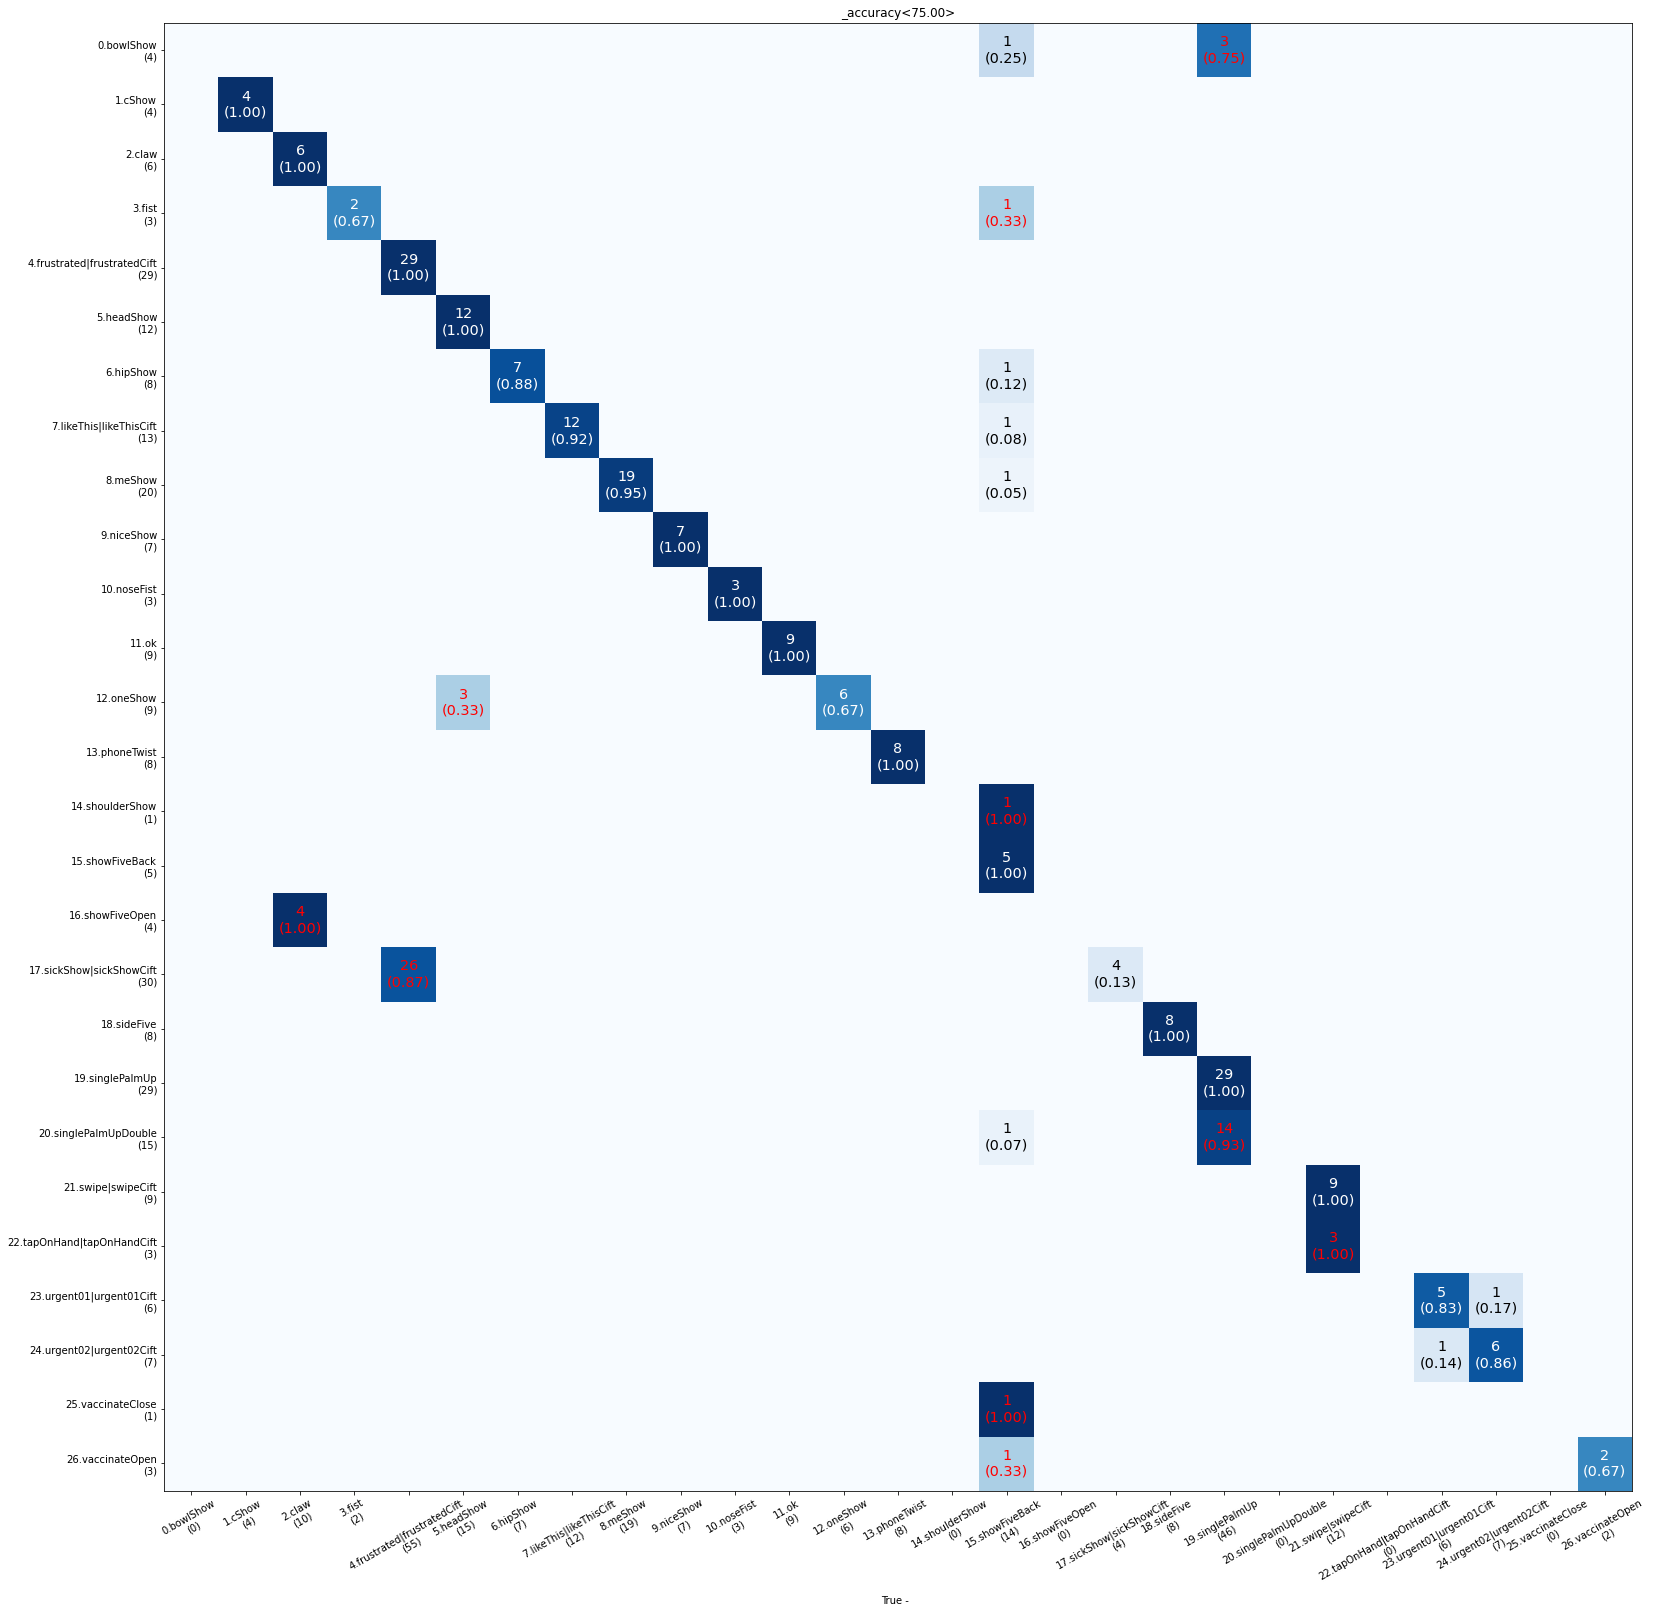

Cohens Kappa for doga_256
K(0.73) = (k00-k01)/(k10-k01)
doga_256_8_nmi_score=0.9403593802483594
21  expected -  22  bins extracted.  0  of them have 1 sample
hist counts ascending =  [41 30 29 19 13 13 13 12 11 10  9  8  8  7  7  7  5  5  4  3  2]
              metric      value
0           accuracy  86.718750
1     weightedPurity  86.718750
2  weightedPrecision  79.894444
3     weightedRecall  86.718750
4    weightedF1Score  82.332900
figMulCnt =  1.0


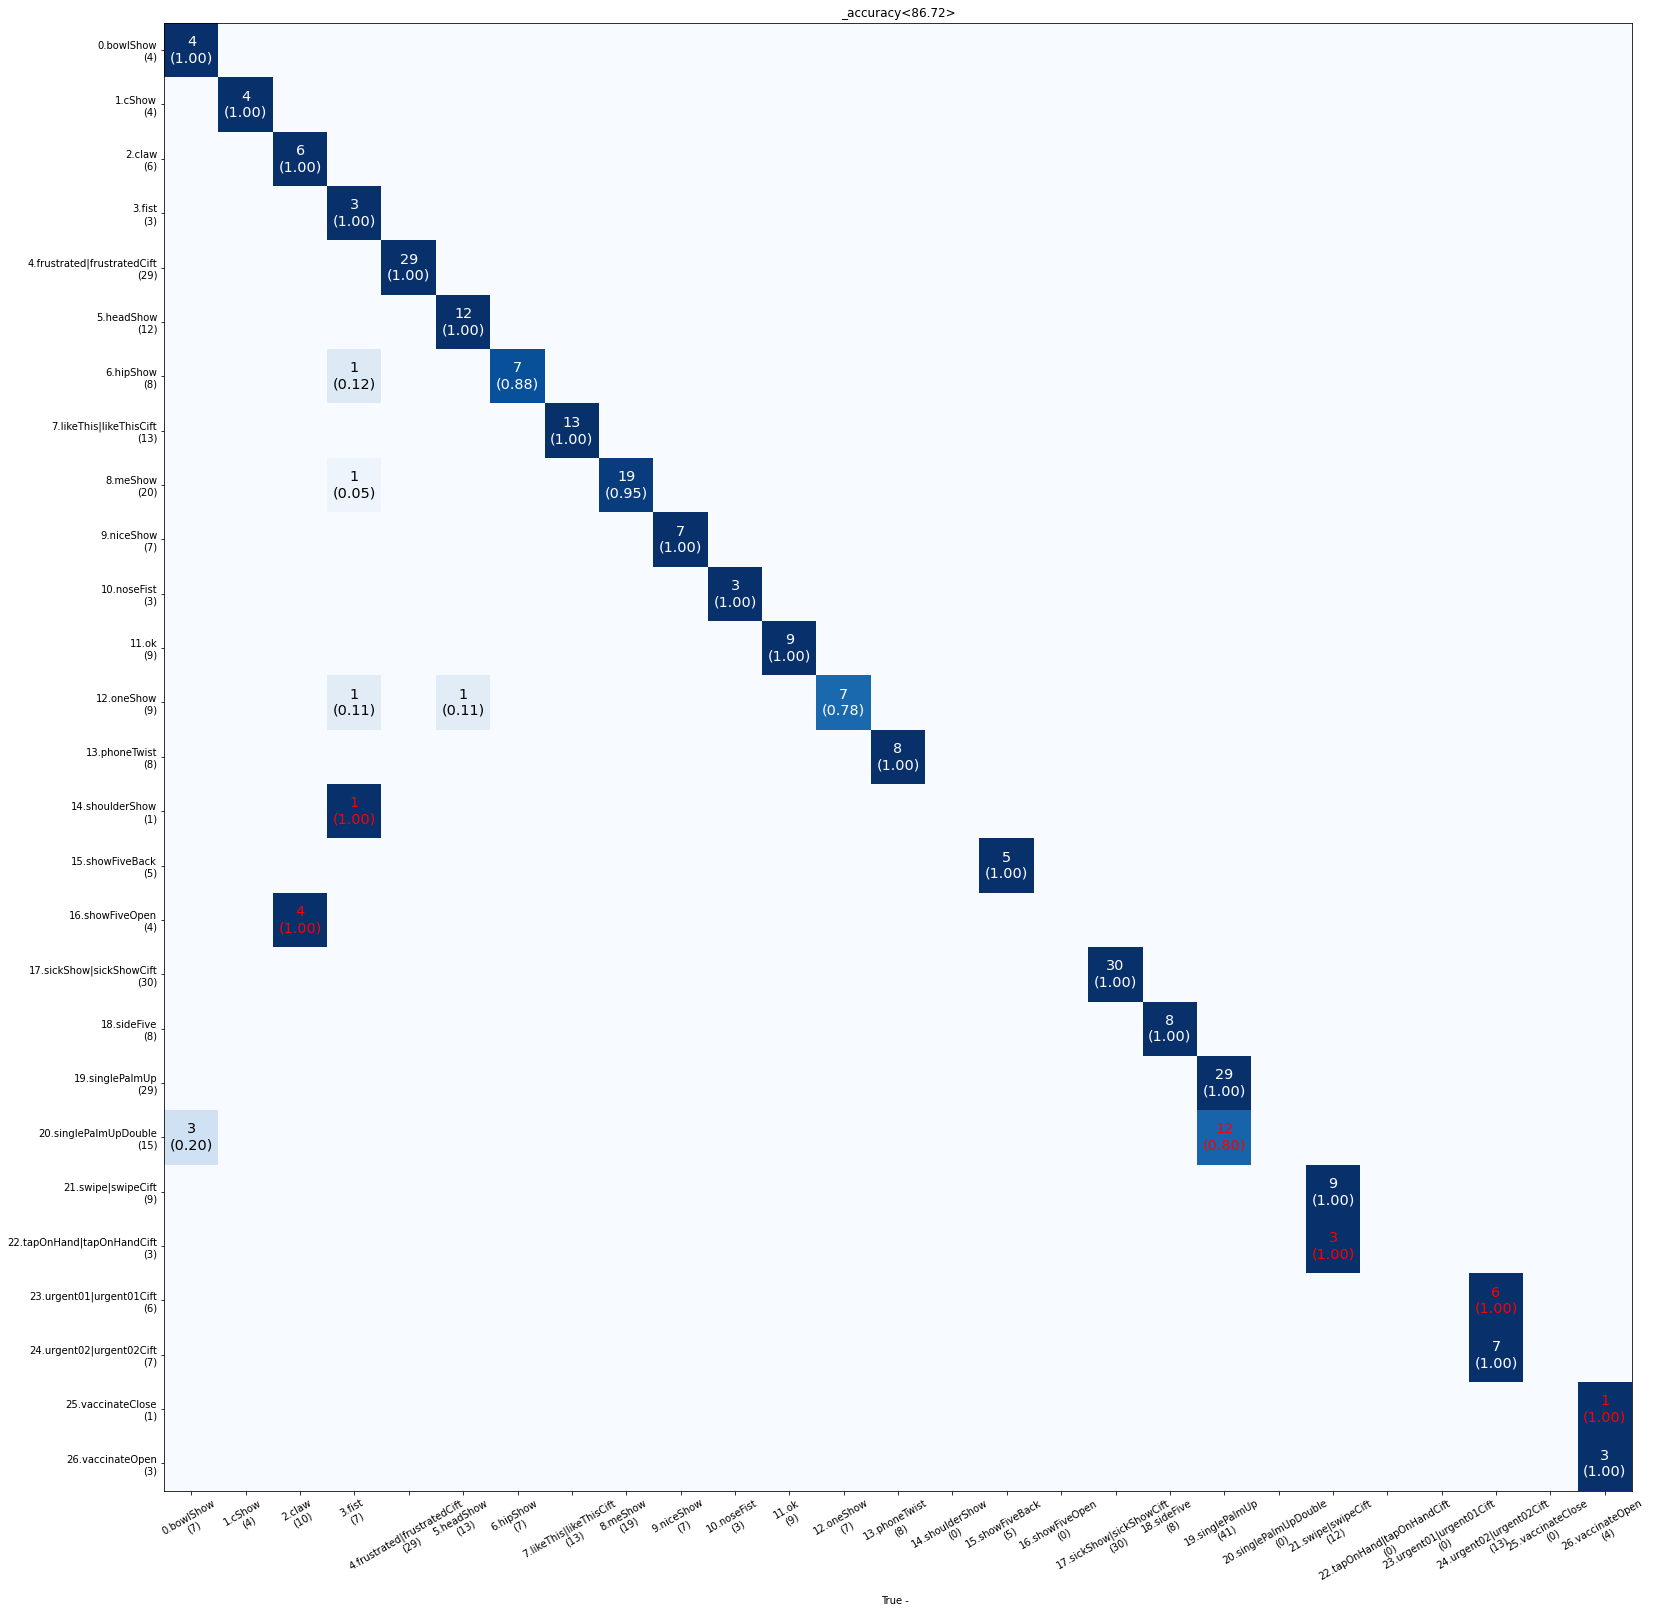

Cohens Kappa for doga_256_8
K(0.86) = (k00-k01)/(k10-k01)
ufuk_256_nmi_score=0.5700960242039769
7  expected -  7  bins extracted.  0  of them have 1 sample
hist counts ascending =  [93 64 48 25 16 10]
              metric      value
0           accuracy  37.500000
1     weightedPurity  37.500000
2  weightedPrecision  24.322299
3     weightedRecall  37.500000
4    weightedF1Score  27.785814
figMulCnt =  1.0


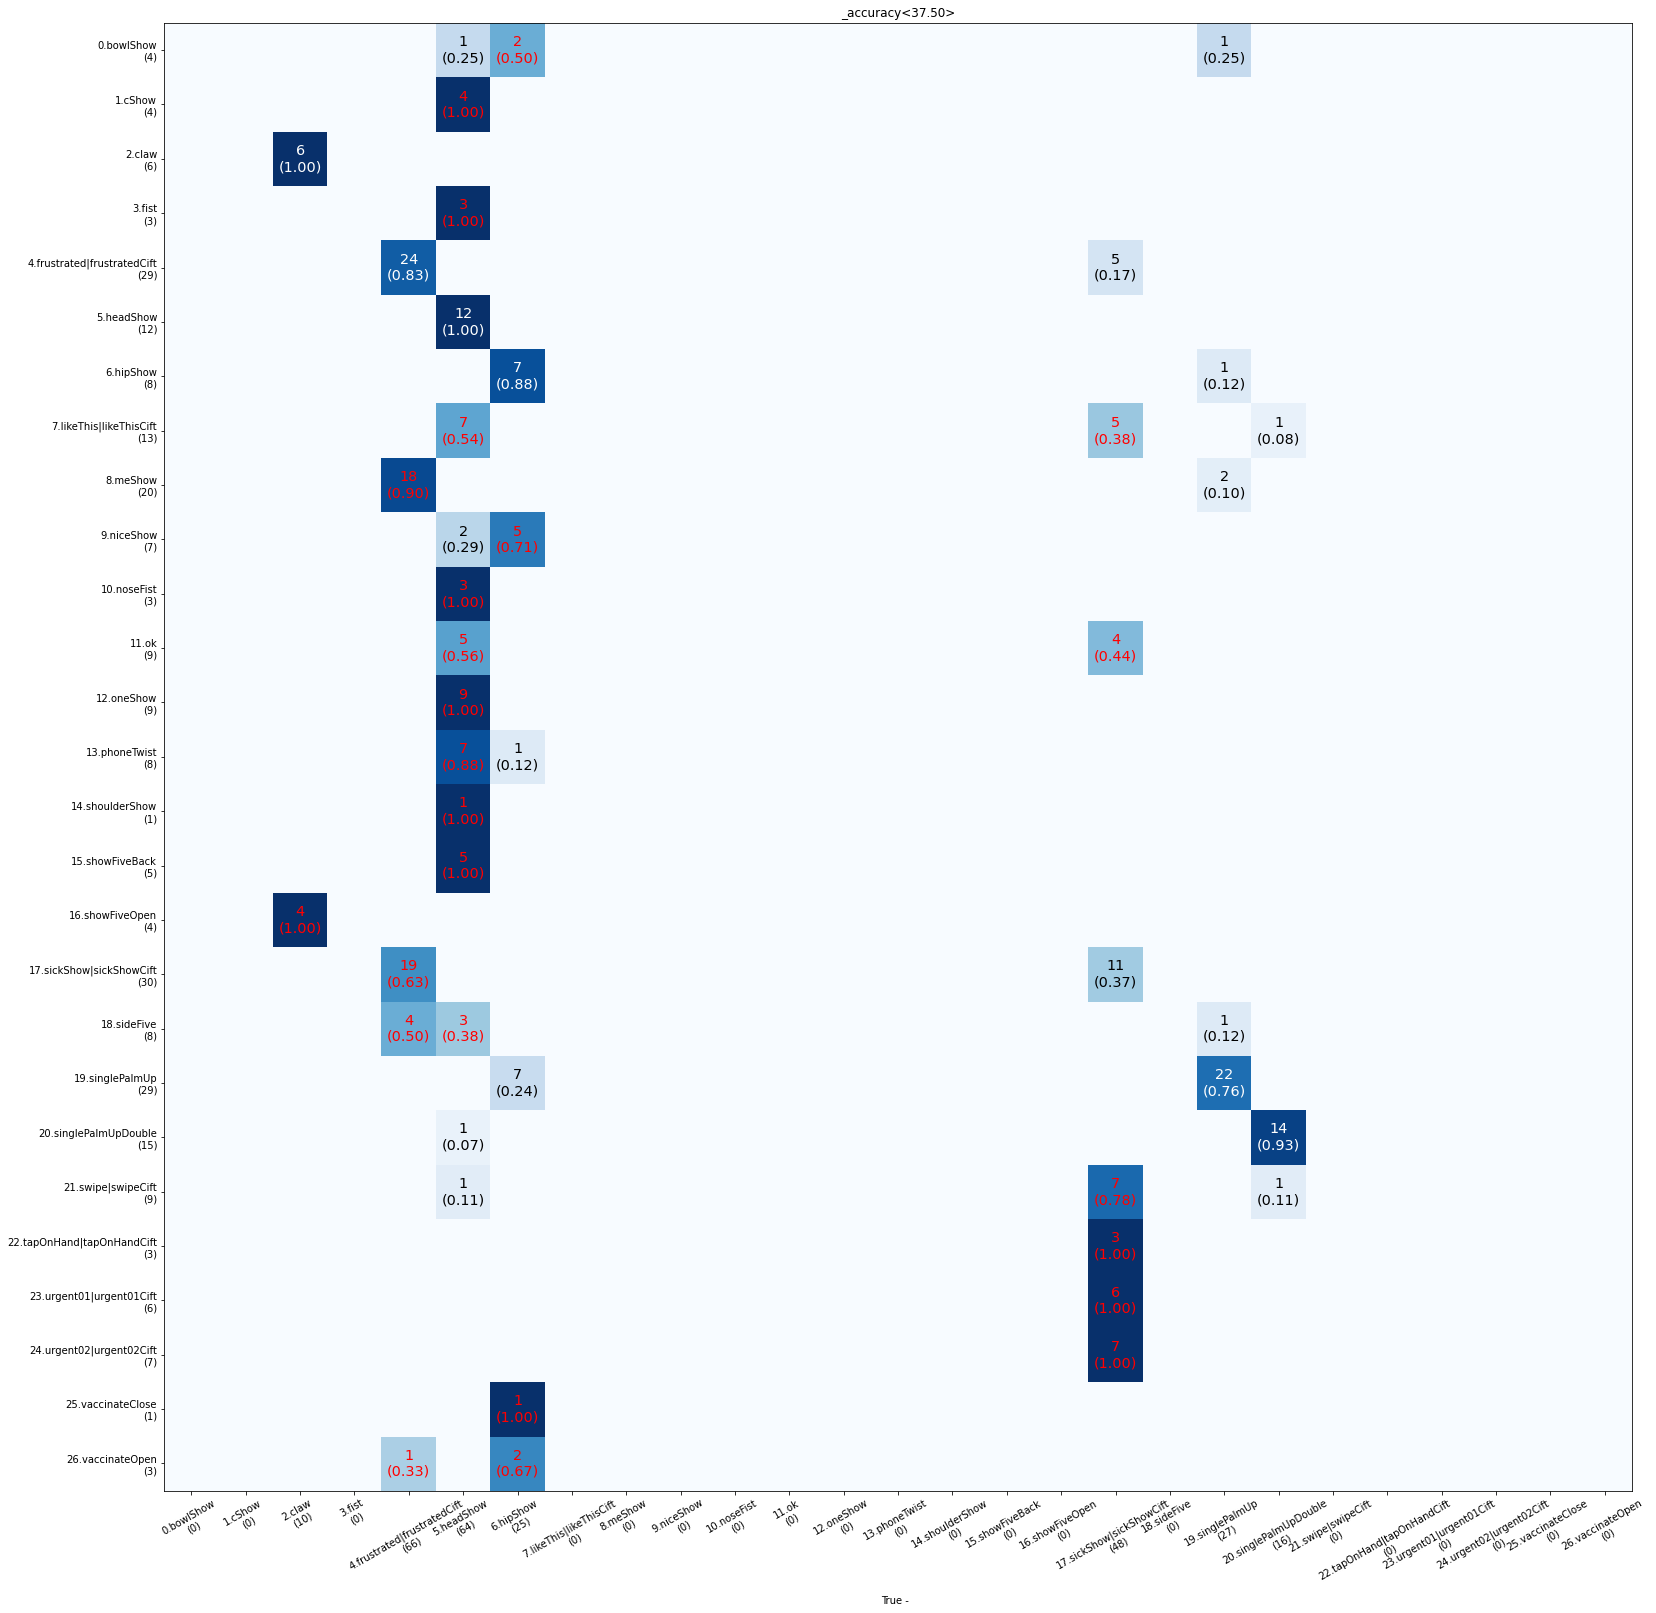

Cohens Kappa for ufuk_256
K(0.32) = (k00-k01)/(k10-k01)
alp_256_nmi_score=0.9167510476216559
31  expected -  32  bins extracted.  2  of them have 1 sample
hist counts ascending =  [29 24 19 18 17 13 12 12 11  9  9  8  8  7  7  7  5  5  5  4  3  3  3  3
  3  3  3  2  2  1  1]
              metric      value
0           accuracy  89.453125
1     weightedPurity  89.453125
2  weightedPrecision  87.467209
3     weightedRecall  89.453125
4    weightedF1Score  87.148330
figMulCnt =  1.0


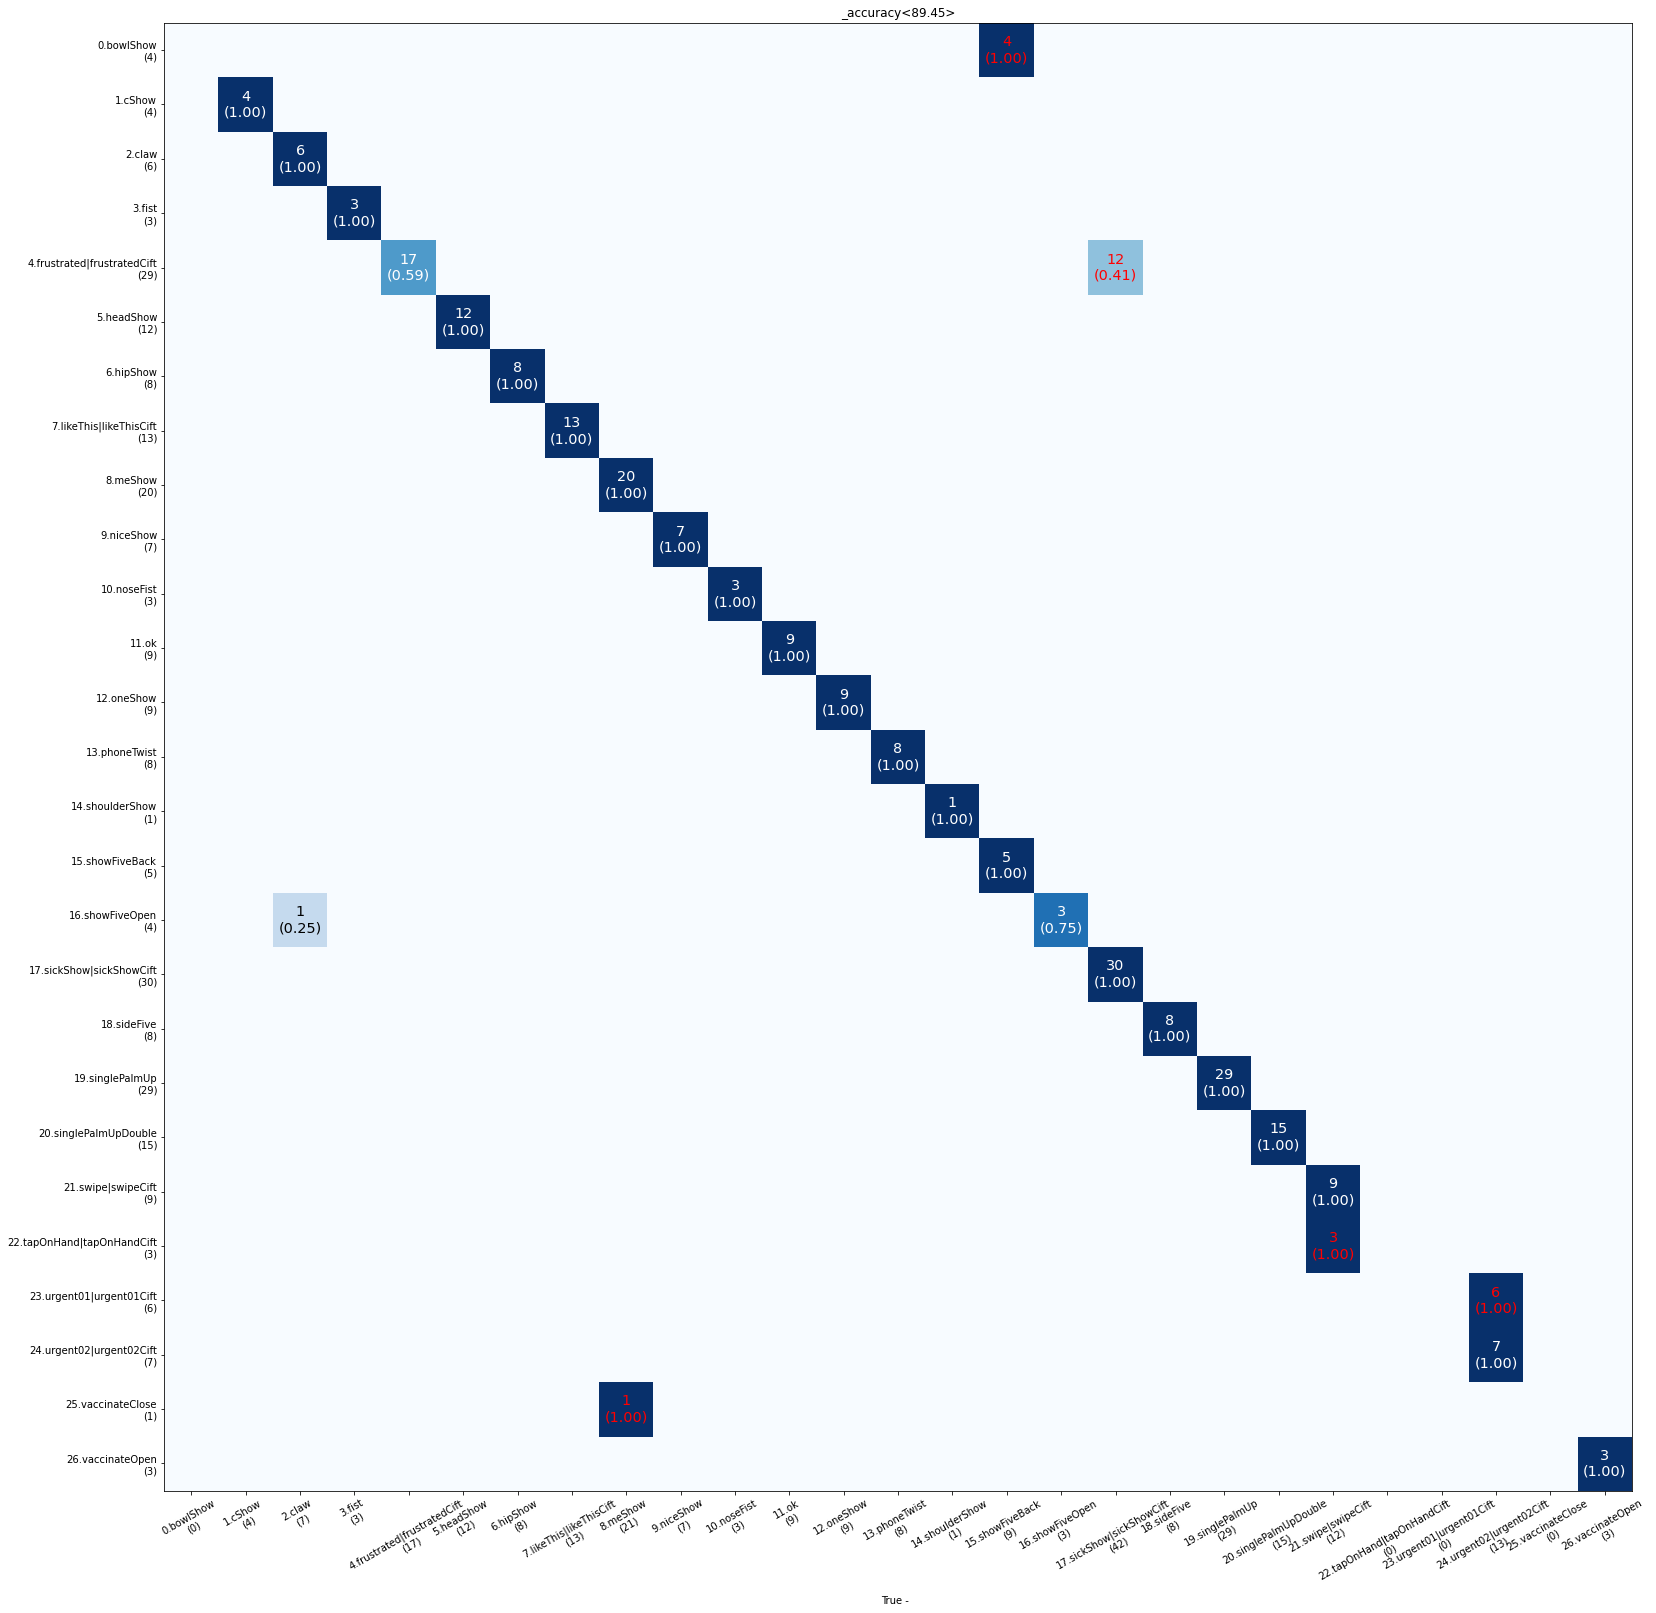

Cohens Kappa for alp_256
K(0.89) = (k00-k01)/(k10-k01)
ogulcan_256_nmi_score=0.8843596808535013
28  expected -  28  bins extracted.  3  of them have 1 sample
hist counts ascending =  [35 34 25 23 13 13 12 11  8  8  8  7  7  7  7  7  6  4  4  4  3  3  2  2
  1  1  1]
              metric      value
0           accuracy  85.937500
1     weightedPurity  85.937500
2  weightedPrecision  82.940666
3     weightedRecall  85.937500
4    weightedF1Score  82.933490
figMulCnt =  1.0


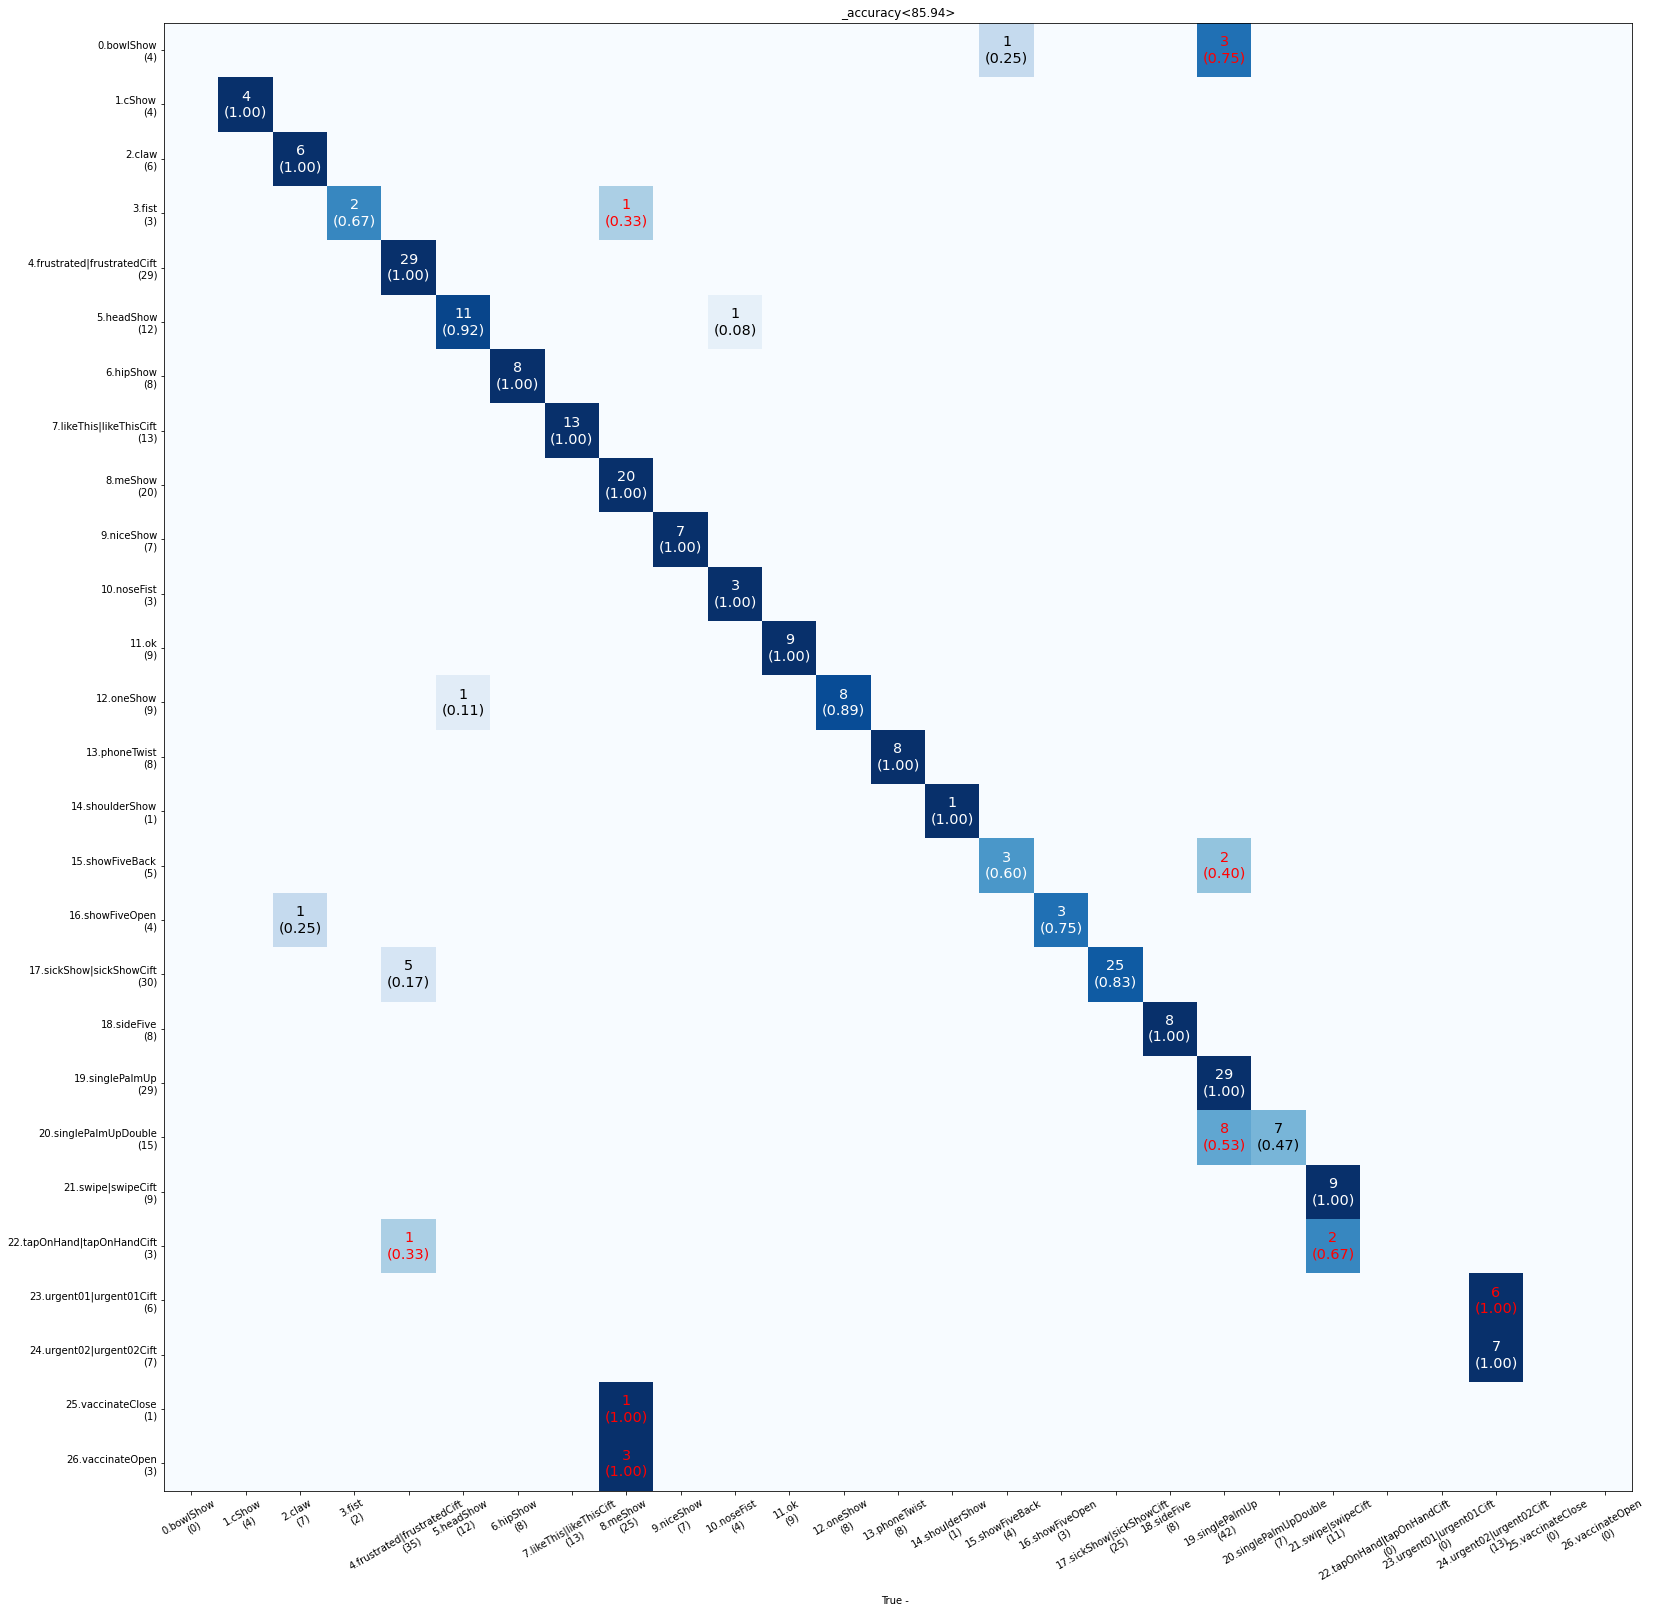

Cohens Kappa for ogulcan_256
K(0.85) = (k00-k01)/(k10-k01)
lale_256_nmi_score=0.9068098269823447
26  expected -  27  bins extracted.  1  of them have 1 sample
hist counts ascending =  [34 30 25 21 15 13 13 11 10  8  8  7  7  7  7  6  6  6  4  4  3  3  3  2
  2  1]
              metric      value
0           accuracy  88.281250
1     weightedPurity  88.281250
2  weightedPrecision  86.569209
3     weightedRecall  88.281250
4    weightedF1Score  86.578418
figMulCnt =  1.0


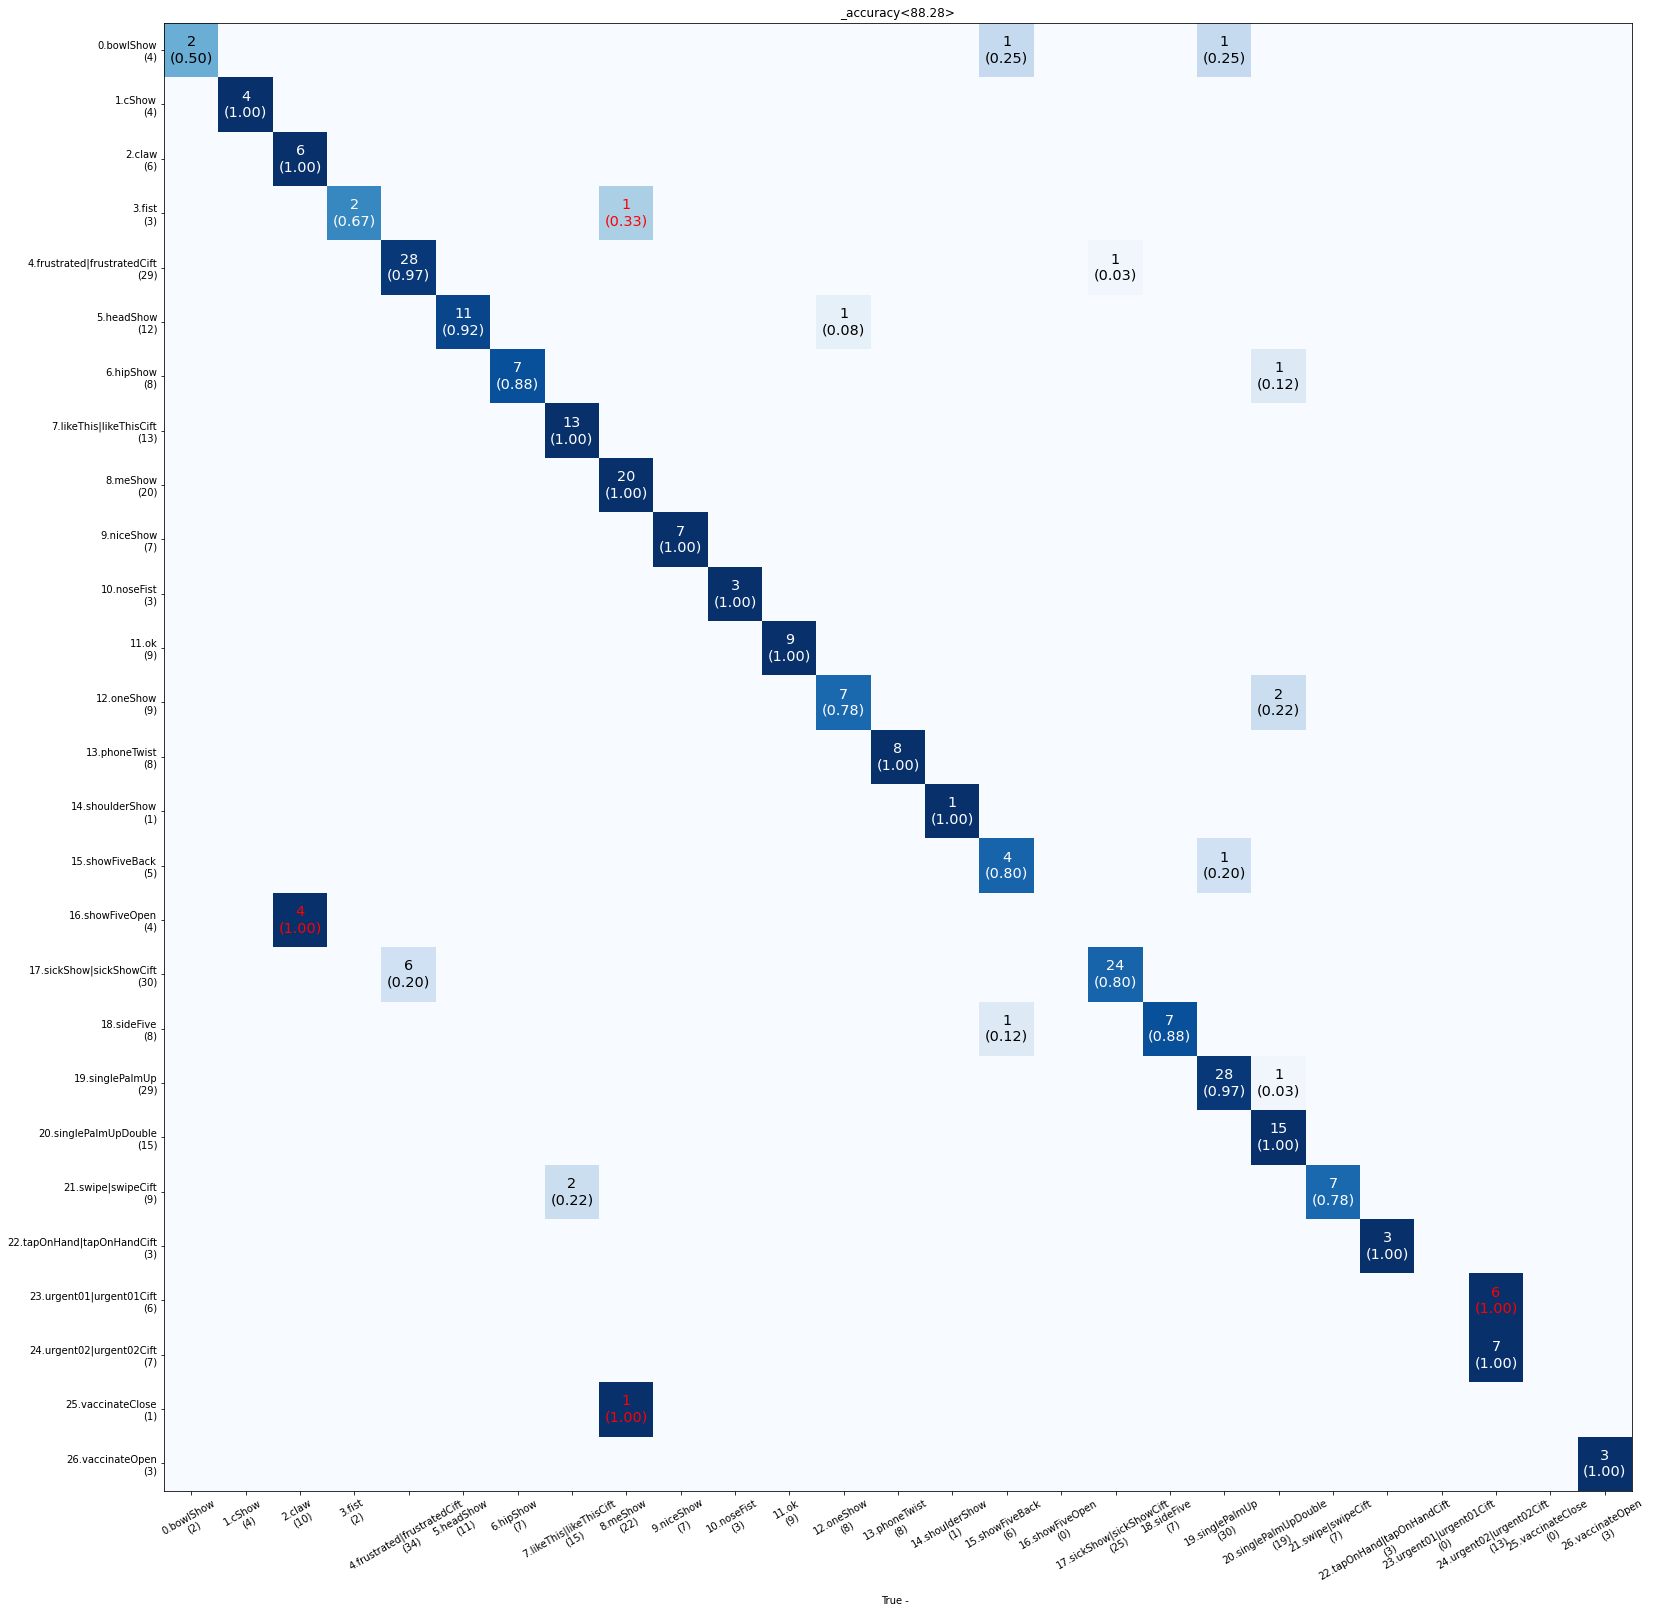

Cohens Kappa for lale_256
K(0.87) = (k00-k01)/(k10-k01)


In [119]:
cohens_kappa_dict, nmi_dict, classRet_dict = ar.analyze_web_str_dict(web_str_dict, ann_dict, int_vec, uniq_X, use_params["cluster_count_use"], verbose=0)

In [152]:
pd_df = pd.DataFrame(columns=['ann_name','cohensKappa', 'nmi', 'acc'])
for k in web_str_dict:
    if "_32" in k and use_params["cluster_count_use"] != 32:
        continue
    if "_256" in k and use_params["cluster_count_use"] != 256:
        continue    
    #print(k)
    ck = cohens_kappa_dict[k]
    v_nmi = nmi_dict[k]
    acc = classRet_dict[k].iloc[0,1]
    #print("cohensKappa({:5.3f}), nmi({:5.3f}), acc({:5.3f})".format(ck,v_nmi,acc))
    pd_df_add = pd.DataFrame({"ann_name":[k],
                              "cohensKappa":[ck],
                              "nmi":[v_nmi],
                              "acc":[acc]})
    pd_df = pd_df.append(pd_df_add, ignore_index = True)
display(pd_df)

ann_name  cohensKappa       nmi        acc
0     doga_256     0.731599  0.879167  75.000000
1   doga_256_8     0.857671  0.940359  86.718750
2     ufuk_256     0.318821  0.570096  37.500000
3      alp_256     0.887131  0.916751  89.453125
4  ogulcan_256     0.848774  0.884360  85.937500
5     lale_256     0.874506  0.906810  88.281250

In [117]:
cohens_kappa_dict

{'doga_256': 0.7315990367445899,
 'doga_256_8': 0.8576707983124571,
 'ufuk_256': 0.3188205750777469,
 'alp_256': 0.8871307500122471,
 'ogulcan_256': 0.8487742443634931,
 'lale_256': 0.8745057028007451}

In [118]:
nmi_dict

{'doga_256': 0.8791672364528204,
 'doga_256_8': 0.9403593802483594,
 'ufuk_256': 0.5700960242039769,
 'alp_256': 0.9167510476216559,
 'ogulcan_256': 0.8843596808535013,
 'lale_256': 0.9068098269823447}

75.0

In [120]:
classRet_dict

{'doga_256':               metric      value
 0           accuracy  75.000000
 1     weightedPurity  75.000000
 2  weightedPrecision  74.730169
 3     weightedRecall  75.000000
 4    weightedF1Score  68.927999,
 'doga_256_8':               metric      value
 0           accuracy  86.718750
 1     weightedPurity  86.718750
 2  weightedPrecision  79.894444
 3     weightedRecall  86.718750
 4    weightedF1Score  82.332900,
 'ufuk_256':               metric      value
 0           accuracy  37.500000
 1     weightedPurity  37.500000
 2  weightedPrecision  24.322299
 3     weightedRecall  37.500000
 4    weightedF1Score  27.785814,
 'alp_256':               metric      value
 0           accuracy  89.453125
 1     weightedPurity  89.453125
 2  weightedPrecision  87.467209
 3     weightedRecall  89.453125
 4    weightedF1Score  87.148330,
 'ogulcan_256':               metric      value
 0           accuracy  85.937500
 1     weightedPurity  85.937500
 2  weightedPrecision  82.940666
 3     w

In [ ]:
 _sx = get_annotation_labels_from_str(doga_256, 256, verbose=1) 